In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [74]:
#load the dataset
df= pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [75]:
#check first five rowd of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
#basic stats of dataset
df.shape

df.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


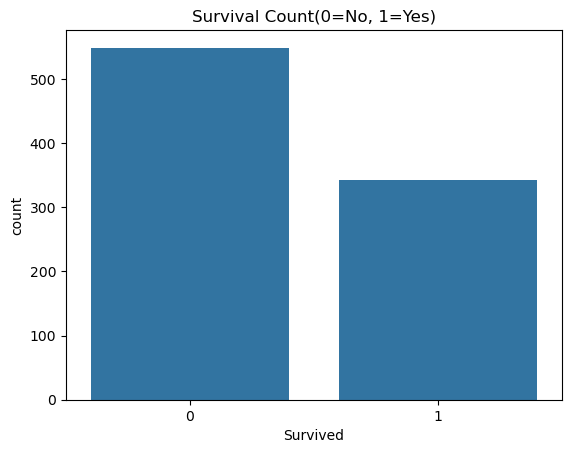

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [78]:
#analyze target variable distribution
sns.countplot(x='Survived', data=df)
plt.title("Survival Count(0=No, 1=Yes)")
plt.show()

df['Survived'].value_counts(normalize=True)

<h3>Analyze categorical features:</h3>

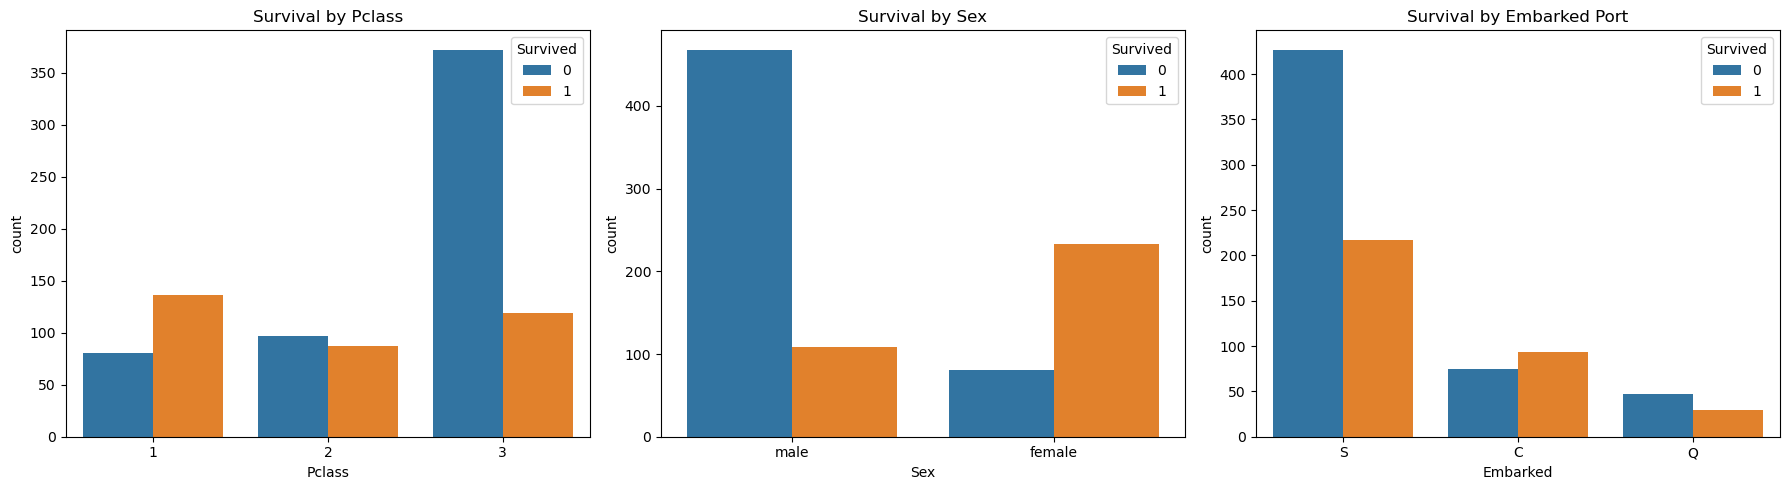

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[0])
axes[0].set_title('Survival by Pclass')
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[1])
axes[1].set_title('Survival by Sex')
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axes[2])
axes[2].set_title('Survival by Embarked Port')
plt.tight_layout()
plt.show()

<h3>Analyze Numerical Features</h3>

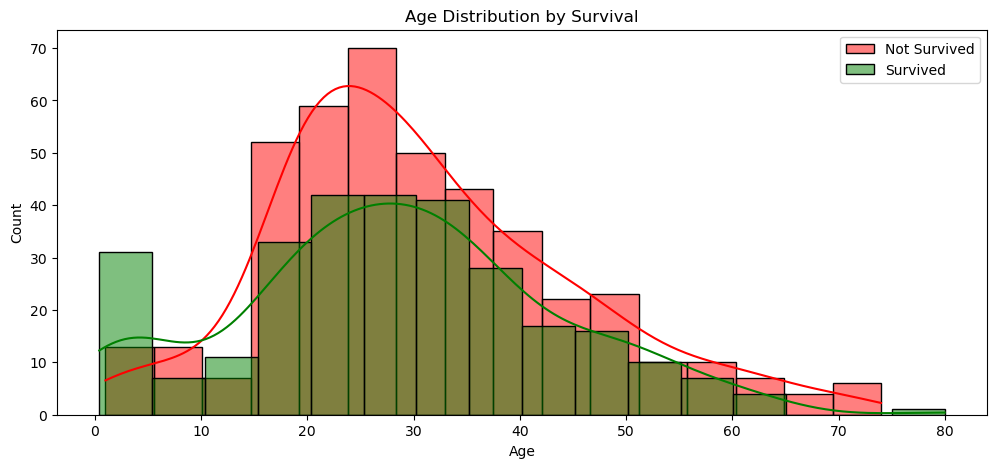

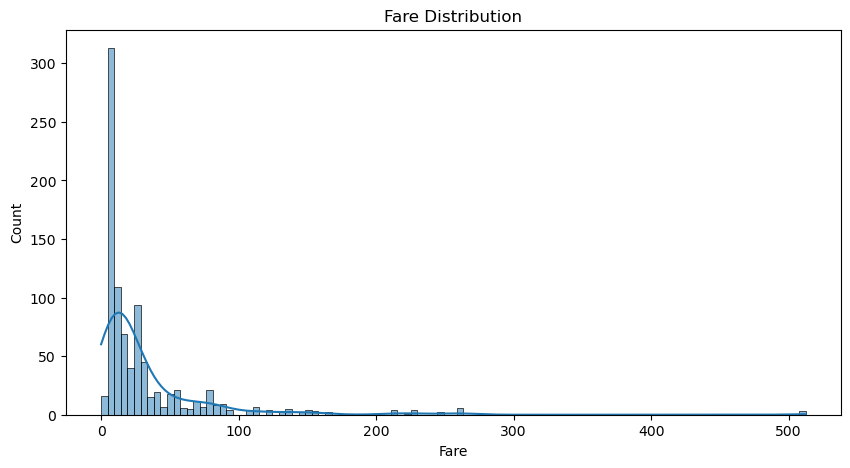

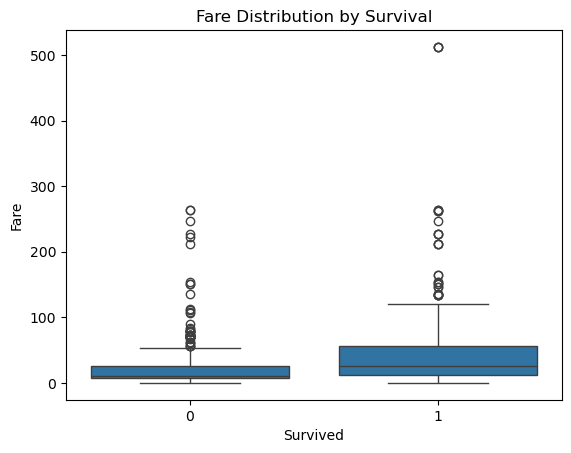

In [80]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df['Survived']==0]['Age'].dropna(), kde=True, color='red', label='Not Survived')
sns.histplot(df[df['Survived']==1]['Age'].dropna(), kde=True, color='green', label='Survived')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

#Box plots for numerical vs. categorical (survival v Fare)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

In [81]:
#check null values in dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3>Handle missing value</h3>


In [82]:
#age with median, embarked with mode. For cabin create 'hascabin' feature

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['HasCabin'] = df['Cabin'].notnull().astype(int)
df.drop('Cabin', axis=1, inplace=True)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64

In [27]:
#!pip install missingno

<Axes: >

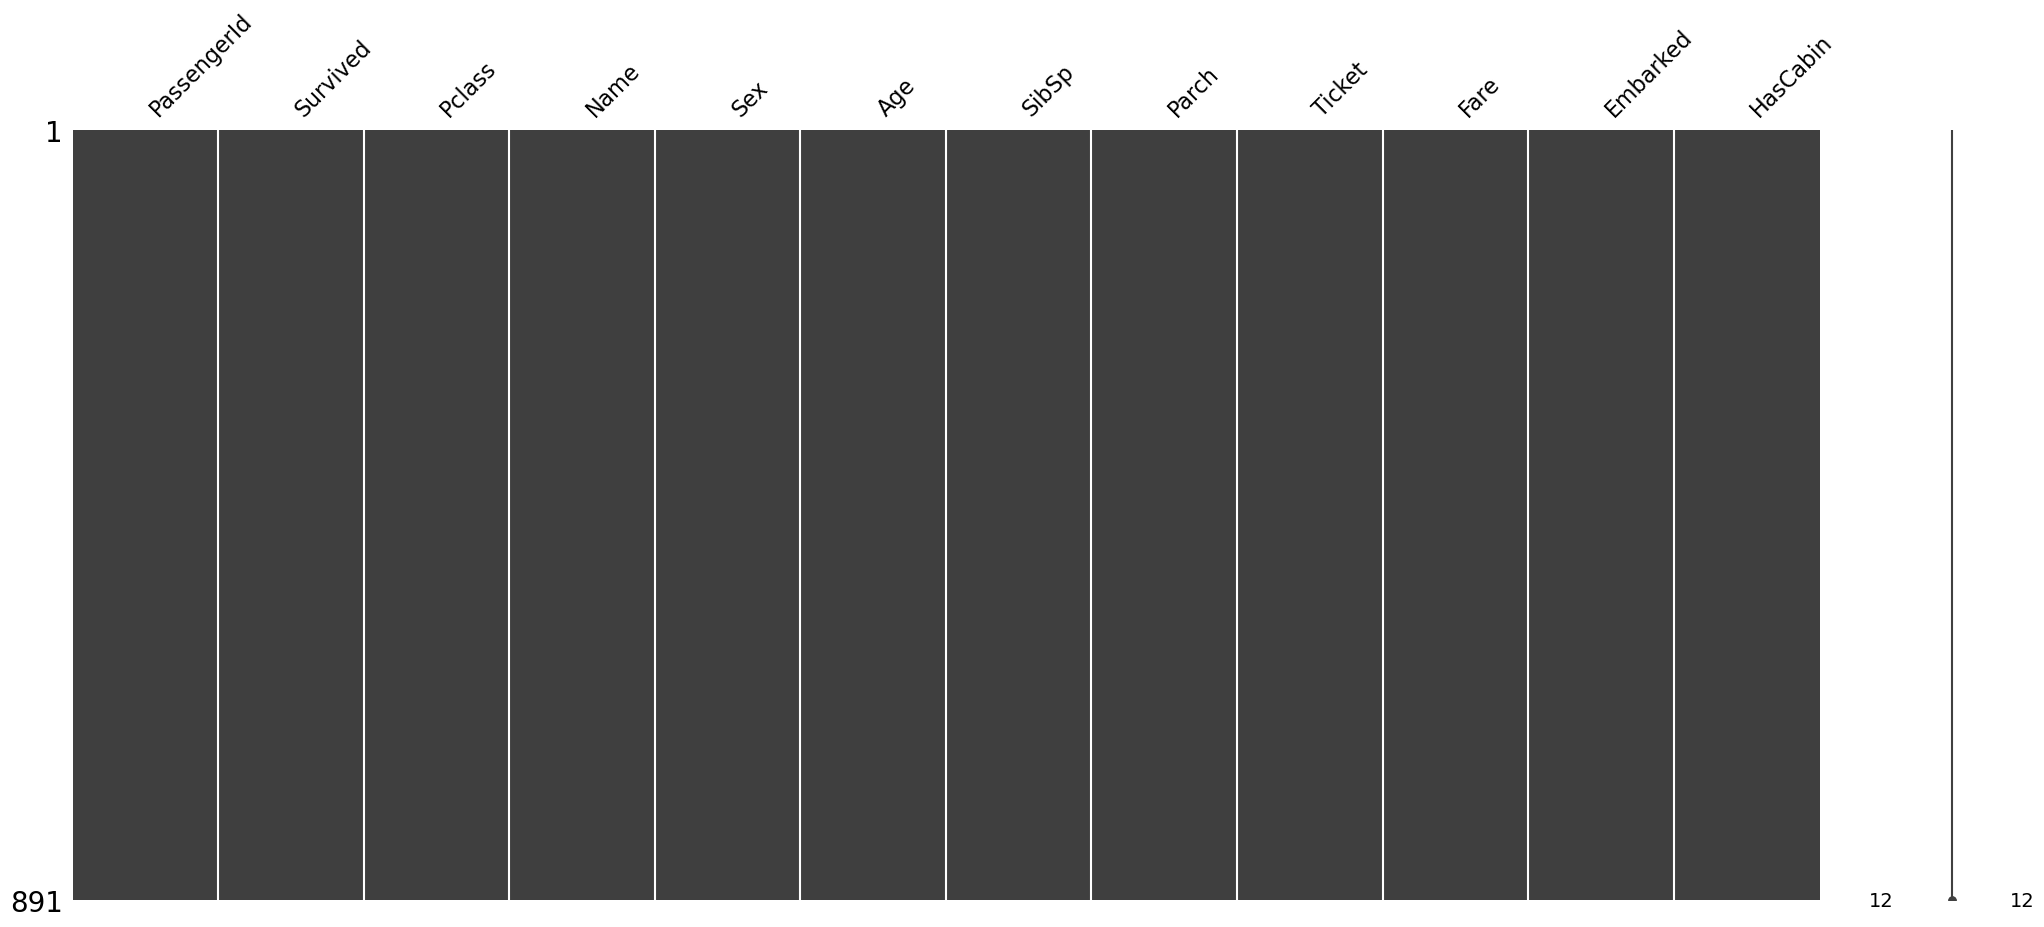

In [83]:
#import missingno as msno
msno.matrix(df)


<h3>Feature Engineering</h3>

In [84]:
#create FamilySize, IsAlone, Title

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

#extract title from name
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')

# Group rare and normalize
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir', 
                                   'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

df = df.drop(['Name', 'PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1) 

In [85]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,HasCabin,FamilySize,IsAlone,Title
0,0,3,male,22.0,7.2500,S,0,2,0,Mr
1,1,1,female,38.0,71.2833,C,1,2,0,Mrs
2,1,3,female,26.0,7.9250,S,0,1,1,Miss
3,1,1,female,35.0,53.1000,S,1,2,0,Mrs
4,0,3,male,35.0,8.0500,S,0,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0,1,1,Rare
887,1,1,female,19.0,30.0000,S,1,1,1,Miss
888,0,3,female,28.0,23.4500,S,0,4,0,Miss
889,1,1,male,26.0,30.0000,C,1,1,1,Mr


In [86]:
#label encoding for Sex and one-hot encoding gor Emabrked,Title
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

df = pd.get_dummies(df,columns=['Embarked','Title'], drop_first=True, dtype=int)

In [87]:
df

,Survived,Pclass,Sex,Age,Fare,HasCabin,FamilySize,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_the Countess
0,0,3,1,22.0,7.2500,0,2,0,0,1,0,1,0,0,0
1,1,1,0,38.0,71.2833,1,2,0,0,0,0,0,1,0,0
2,1,3,0,26.0,7.9250,0,1,1,0,1,1,0,0,0,0
3,1,1,0,35.0,53.1000,1,2,0,0,1,0,0,1,0,0
4,0,3,1,35.0,8.0500,0,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,0,1,1,0,1,0,0,0,1,0
887,1,1,0,19.0,30.0000,1,1,1,0,1,1,0,0,0,0
888,0,3,0,28.0,23.4500,0,4,0,0,1,1,0,0,0,0
889,1,1,1,26.0,30.0000,1,1,1,0,0,0,1,0,0,0


In [88]:
df.isnull().sum()

Survived              0
Pclass                0
Sex                   0
Age                   0
Fare                  0
HasCabin              0
FamilySize            0
IsAlone               0
Embarked_Q            0
Embarked_S            0
Title_Miss            0
Title_Mr              0
Title_Mrs             0
Title_Rare            0
Title_the Countess    0
dtype: int64

In [89]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [91]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Apply ML Model</h3>


Logistic Regression Performance:
Accuracy:  0.8101
Precision: 0.7778
Recall:    0.7568
F1-score:  0.7671
Confusion Matrix:
[[89 16]
 [18 56]]
AUC:       0.8864


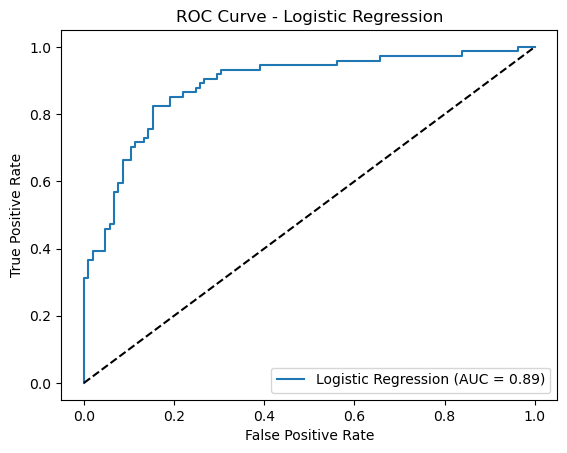

In [96]:
# --- Logistic Regression ---
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

print("\nLogistic Regression Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred_lr):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print(f"AUC:       {roc_auc_score(y_test, y_proba_lr):.4f}")

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_lr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Decision Tree Performance:
Accuracy:  0.7933
Precision: 0.7467
Recall:    0.7568
F1-score:  0.7517
Confusion Matrix:
[[86 19]
 [18 56]]
AUC:       0.7956


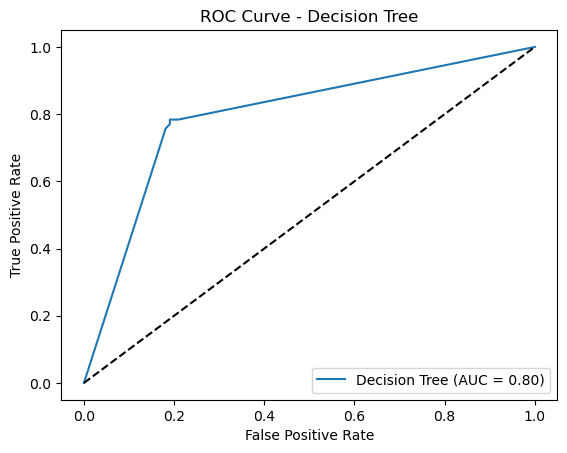

In [97]:
# --- Decision Tree ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

print("Decision Tree Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred_dt):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print(f"AUC:       {roc_auc_score(y_test, y_proba_dt):.4f}")

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_proba_dt):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()



Random Forest Performance:
Accuracy:  0.8380
Precision: 0.8000
Recall:    0.8108
F1-score:  0.8054
Confusion Matrix:
[[90 15]
 [14 60]]
AUC:       0.9033


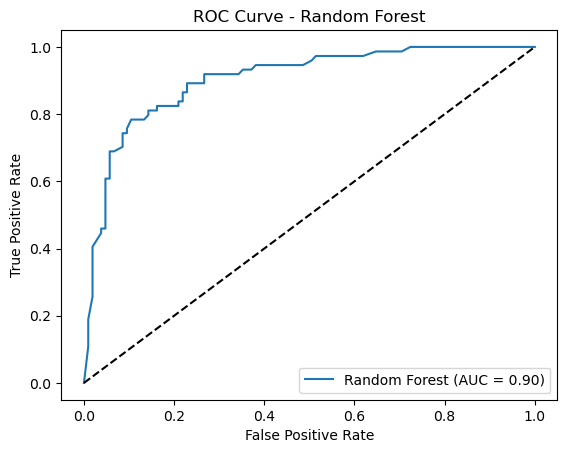

In [98]:
# --- Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("\nRandom Forest Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"AUC:       {roc_auc_score(y_test, y_proba_rf):.4f}")

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

<h3>Tuning</h3>

Starting Random Forest Hyperparameter Tuning (on already preprocessed data)...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>
    exitcode = process_obj._bootstrap()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, max_features=s

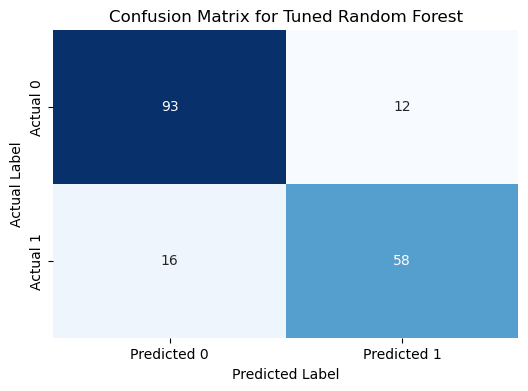

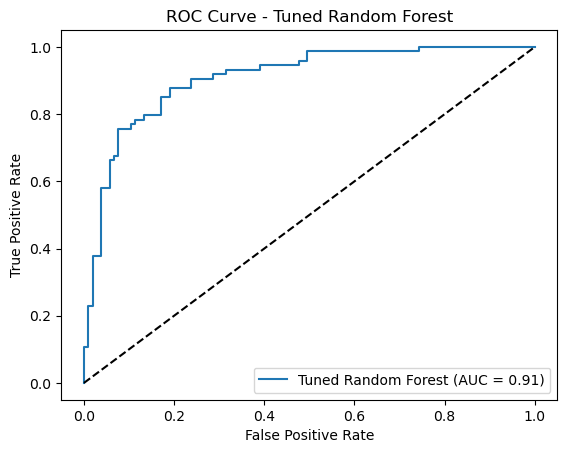


--- Comparison of Initial vs. Tuned Random Forest ---

**Initial Random Forest Performance:**
Accuracy:  0.8380
Precision: 0.8000
Recall:    0.8108
F1-score:  0.8054
Confusion Matrix:
[[90 15]
 [14 60]]
AUC:       0.9033

**Tuned Random Forest Performance:**
Accuracy:  0.8436
Precision: 0.8286
Recall:    0.7838
F1-Score:  0.8056
Confusion Matrix:
[[93 12]
 [16 58]]
AUC:       0.9077


In [102]:
from sklearn.model_selection import GridSearchCV

# --- Define the RandomForestClassifier to be tuned ---
# Since X_train and X_test are assumed to be already preprocessed,
# we don't need the ColumnTransformer within the pipeline for tuning.
# We're just tuning the classifier directly.
rf_classifier = RandomForestClassifier(random_state=42)

# --- Define the Hyperparameter Grid ---
# This grid is for the RandomForestClassifier directly.
param_grid = {
    'n_estimators': [100, 200, 300, 400], # Explore a wider range
    'max_features': ['sqrt', 'log2', 0.8], # 'sqrt' and 'log2' are good defaults, 0.8 means 80% of features
    'max_depth': [10, 20, 30, None], # Max depth of trees
    'min_samples_split': [2, 5, 10], # Min samples to split a node
    'min_samples_leaf': [1, 2, 4] # Min samples per leaf
}

# --- Perform GridSearchCV ---
# We're directly fitting GridSearchCV to the preprocessed X_train.
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1')

print("Starting Random Forest Hyperparameter Tuning (on already preprocessed data)...")
grid_search.fit(X_train, y_train)
print("GridSearchCV complete.")

# --- Get the Best Parameters and Best Score ---
print("\nBest Parameters found by GridSearchCV:")
print(grid_search.best_params_)
print(f"\nBest F1-Score from GridSearchCV (on validation sets): {grid_search.best_score_:.4f}")

# --- Evaluate the Best Model on the Test Set ---
best_rf_model_tuned = grid_search.best_estimator_

y_pred_tuned_rf = best_rf_model_tuned.predict(X_test)
y_proba_tuned_rf = best_rf_model_tuned.predict_proba(X_test)[:, 1]

# --- Evaluate and Compare ---
print("\n--- Tuned Random Forest Classifier Performance on Test Set ---")
accuracy_tuned = accuracy_score(y_test, y_pred_tuned_rf)
precision_tuned = precision_score(y_test, y_pred_tuned_rf)
recall_tuned = recall_score(y_test, y_pred_tuned_rf)
f1_tuned = f1_score(y_test, y_pred_tuned_rf)
roc_auc_tuned = roc_auc_score(y_test, y_proba_tuned_rf)
cm_tuned = confusion_matrix(y_test, y_pred_tuned_rf)

print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-Score: {f1_tuned:.4f}")
print(f"Confusion Matrix:\n{cm_tuned}")
print(f"AUC: {roc_auc_tuned:.4f}")

# Plotting Confusion Matrix for Tuned Model
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Tuned Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting ROC Curve for Tuned Model
fpr_tuned_rf, tpr_tuned_rf, _ = roc_curve(y_test, y_proba_tuned_rf)
plt.figure()
plt.plot(fpr_tuned_rf, tpr_tuned_rf, label=f'Tuned Random Forest (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend(loc='lower right')
plt.show()


# --- Direct Comparison ---
print("\n--- Comparison of Initial vs. Tuned Random Forest ---")

print("\n**Initial Random Forest Performance:**")
print(f"Accuracy:  0.8380")
print(f"Precision: 0.8000")
print(f"Recall:    0.8108")
print(f"F1-score:  0.8054")
print(f"Confusion Matrix:\n[[90 15]\n [14 60]]")
print(f"AUC:       0.9033")

print("\n**Tuned Random Forest Performance:**")
print(f"Accuracy:  {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall:    {recall_tuned:.4f}")
print(f"F1-Score:  {f1_tuned:.4f}")
print(f"Confusion Matrix:\n{cm_tuned}")
print(f"AUC:       {roc_auc_tuned:.4f}")
